Project 1 : Temperature Data

### COMMENTS

- Please have accompaning explanations for each block of code you write. There is no way another person understands what you wrote until you have that
- Analysis doesn't mean only code, it should also tell a story and thought process. Data Analysts need to tell a story and convince people, if you can't do that then your analysis no matter how good doesn't help

## Further Exercise

- Try using Plotly to plot your graphs. they are interactive and make beautiful charts


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib import should always be followed by
# %matplotlib inline 
# for Jupyter Notebooks. The above command will allow you to plot inside Jupyter notebooks

In [9]:
#reading data in panda dataframes
global_data = pd.read_csv('Global_Data.csv')
SF_data = pd.read_csv('City_Data.csv') # PEP8 states that variable names should be in lower case always

In [13]:
global_data.head(10)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
5,1755,8.36
6,1756,8.85
7,1757,9.02
8,1758,6.74
9,1759,7.99


In [12]:
SF_data.head(10)

,year,city,country,avg_temp
0,1849,San Francisco,United States,14.12
1,1850,San Francisco,United States,13.80
2,1851,San Francisco,United States,14.39
3,1852,San Francisco,United States,13.81
4,1853,San Francisco,United States,14.40
5,1854,San Francisco,United States,13.98
6,1855,San Francisco,United States,14.20
7,1856,San Francisco,United States,14.10
8,1857,San Francisco,United States,14.78
9,1858,San Francisco,United States,14.19


In [18]:
#sorting city data based on 'year'
SF_data_sorted = SF_data.sort_values('year')

SF_data_sorted.head(10)

,year,city,country,avg_temp
0,1849,San Francisco,United States,14.12
1,1850,San Francisco,United States,13.80
2,1851,San Francisco,United States,14.39
3,1852,San Francisco,United States,13.81
4,1853,San Francisco,United States,14.40
5,1854,San Francisco,United States,13.98
6,1855,San Francisco,United States,14.20
7,1856,San Francisco,United States,14.10
8,1857,San Francisco,United States,14.78
9,1858,San Francisco,United States,14.19


In [33]:
#sorting global data based on 'year'
global_data_sorted_1 = global_data.sort_values('year')
global_data_sorted_1.head(10) # This won't print anything unless it is the last statement in the block. 
                              # Use print() to print to print in between blocks

#removing year values between 1849 and 2013 as city data has values from 1849 to 2013
global_data_sorted = global_data_sorted_1[(global_data_sorted_1['year']>=1849) & (global_data_sorted_1['year']<=2013)] 
global_data_sorted.head(10)

,year,avg_temp
99,1849,7.98
100,1850,7.90
101,1851,8.18
102,1852,8.10
103,1853,8.04
104,1854,8.21
105,1855,8.11
106,1856,8.00
107,1857,7.76
108,1858,8.10


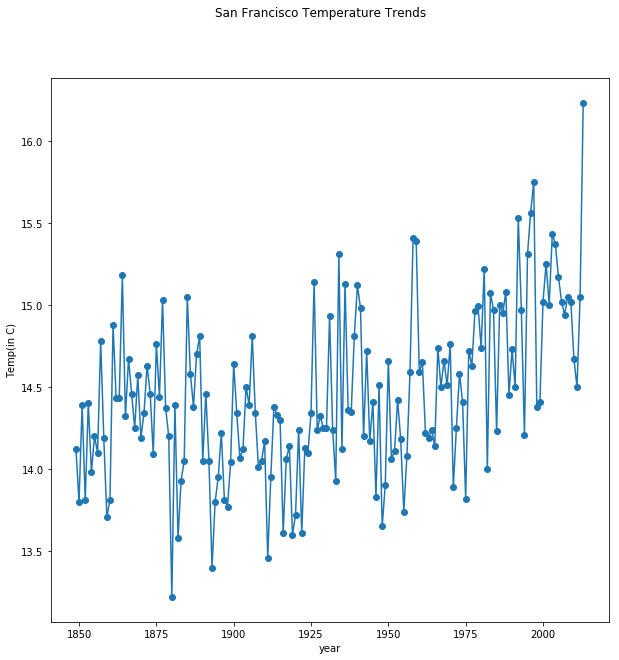

In [53]:
#plotting city temperature data on a line graph
plt.figure(figsize=(10,10))
plt.plot(SF_data_sorted['year'],SF_data_sorted['avg_temp'],marker='o')

#labelling the graph
plt.suptitle('San Francisco Temperature Trends')
plt.xlabel('year')
plt.ylabel('Temp(in C)')

plt.show()

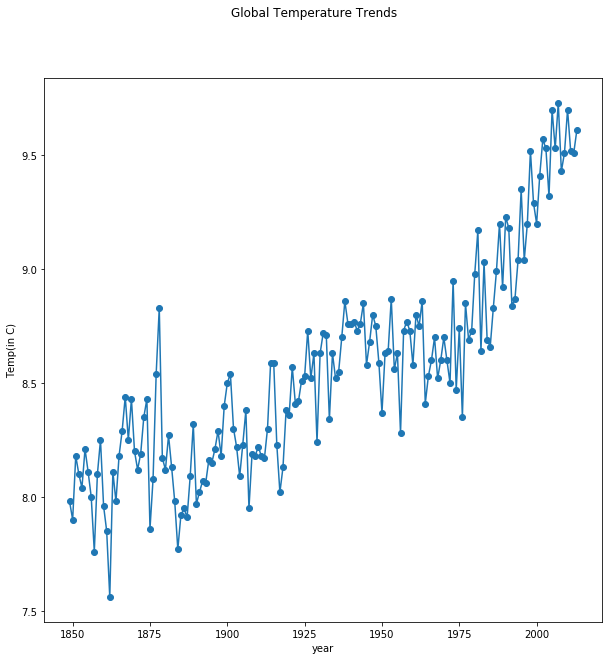

In [54]:
#plotting city temperature data on a line graph
plt.figure(figsize=(10,10))
plt.plot(global_data_sorted['year'],global_data_sorted['avg_temp'],marker='o')

#labelling the graph
plt.suptitle('Global Temperature Trends')
plt.xlabel('year')
plt.ylabel('Temp(in C)')

plt.show()

In [61]:
#merging the two dataframes on 'year' column
temp_trends = pd.merge(SF_data_sorted, global_data_sorted, on='year')

#renaming the temp columns for SF and global data
temp_trends.columns=['year','city','country','avg_temp_SF','avg_temp_global']
temp_trends.head(10)

,year,city,country,avg_temp_SF,avg_temp_global
0,1849,San Francisco,United States,14.12,7.98
1,1850,San Francisco,United States,13.80,7.90
2,1851,San Francisco,United States,14.39,8.18
3,1852,San Francisco,United States,13.81,8.10
4,1853,San Francisco,United States,14.40,8.04
5,1854,San Francisco,United States,13.98,8.21
6,1855,San Francisco,United States,14.20,8.11
7,1856,San Francisco,United States,14.10,8.00
8,1857,San Francisco,United States,14.78,7.76
9,1858,San Francisco,United States,14.19,8.10


In [64]:
#adding columns to calculate moving average for SF and global temperatures


# Excercise: Try filling in the NaNs in the data
temp_trends['temp_mov_avg_SF'] = temp_trends['avg_temp_SF'].rolling(window=5).mean()
temp_trends['temp_mov_avg_global'] = temp_trends['avg_temp_global'].rolling(window=5).mean()

temp_trends.head(10)

,year,city,country,avg_temp_SF,avg_temp_global,temp_mov_avg_SF,temp_mov_avg_global
0,1849,San Francisco,United States,14.12,7.98,NaN,NaN
1,1850,San Francisco,United States,13.80,7.90,NaN,NaN
2,1851,San Francisco,United States,14.39,8.18,NaN,NaN
3,1852,San Francisco,United States,13.81,8.10,NaN,NaN
4,1853,San Francisco,United States,14.40,8.04,14.104,8.040
5,1854,San Francisco,United States,13.98,8.21,14.076,8.086
6,1855,San Francisco,United States,14.20,8.11,14.156,8.128
7,1856,San Francisco,United States,14.10,8.00,14.098,8.092
8,1857,San Francisco,United States,14.78,7.76,14.292,8.024
9,1858,San Francisco,United States,14.19,8.10,14.250,8.036


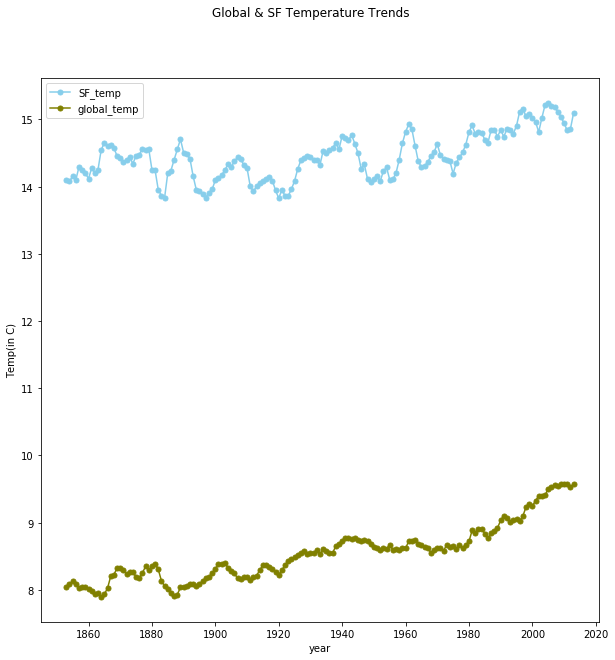

In [80]:
#plotting the temperature trends on a line chart
plt.figure(figsize=(10,10))
plt.plot( temp_trends['year'], temp_trends['temp_mov_avg_SF'],marker='o',markersize=5,color='skyblue',label="SF_temp")
plt.plot( temp_trends['year'], temp_trends['temp_mov_avg_global'],marker='o',markersize=5, color='olive',label="global_temp")

#labelling the graph
plt.suptitle('Global & SF Temperature Trends')
plt.xlabel('year')
plt.ylabel('Temp(in C)')

plt.legend()
plt.show()

Steps taken to prepare the visualization:
1) Using SQL, data was extracted from the database for San Francisco & global temperatures
2) The data was exported in .csv format in 2 separate files for SF and global data
3) Using pandas in Python, data was imported from the 2 .csv files into 2 dataframes - 'SF_data_sorted' & 'global_data_sorted'
4) Data for years common to both SF and global was kept in the dataframes
5) The two dataframes were then merged into a single dataframe - 'temp_trends'
6) Moving average of 5 years was calculated for both SF and global temperatures
7) Both the moving averages were plotted in a line chart

